In [ ]:
"""
    Drive: https://drive.google.com/drive/folders/1hGgF_bdQMk7MG7NiAqqqDTAU6sYw0_yZ?usp=drive_link
    Descripción de las variables
        - sitios: Localización específica donde se realizó el muestreo del agua.
        - campaña: Nombre o número de la campaña de monitoreo en la que se realizó el muestreo.
        - tem agua: Temperatura del agua en grados Celsius.
        - tem aire: Temperatura del aire en grados Celsius.
        - od: Oxígeno disuelto, medido en miligramos por litro (mg/L), esencial para la vida acuática.
        - ph: Medida de la acidez o alcalinidad del agua, en una escala de 0 a 14.
        - olores: Presencia de olores en el agua, que puede indicar contaminación.
        - color: Color del agua, que puede ser un indicador de la calidad del agua.
        - espumas: Presencia de espumas en la superficie del agua, que puede ser un signo de contaminación.
        - mat susp: Materia suspendida, que se refiere a partículas sólidas que flotan en el agua.
        - colif fecales ufc 100ml: Unidades formadoras de colonias de coliformes fecales en 100 ml de agua, un indicador de contaminación fecal.
        - escher coli ufc 100ml: Unidades formadoras de colonias de Escherichia coli en 100 ml de agua, otro indicador de contaminación fecal.
        - enteroc ufc 100ml: Unidades formadoras de colonias de enterococos en 100 ml de agua, que también indican contaminación fecal.
        - nitrato mg l: Concentración de nitratos en miligramos por litro (mg/L), que puede indicar contaminación por fertilizantes.
        - nh4 mg l: Concentración de amonio en miligramos por litro (mg/L), que puede ser un indicador de contaminación orgánica.
        - p total l mg l: Fósforo total en miligramos por litro (mg/L), que incluye todas las formas de fósforo en el agua.
        - fosf ortofos mg l: Concentración de ortofosfatos en miligramos por litro (mg/L), que es un nutriente importante.
        - dbo mg l: Demanda biológica de oxígeno en miligramos por litro (mg/L), que mide la cantidad de oxígeno requerido por microorganismos para descomponer materia orgánica.
        - dqo mg l: Demanda química de oxígeno en miligramos por litro (mg/L), que mide la cantidad total de oxígeno requerido para oxidar materia orgánica e inorgánica.
        - turbiedad ntu: Turbidez del agua medida en unidades NTU (Nephelometric Turbidity Units), que indica la claridad del agua.
        - hidr deriv petr ug l: Hidrocarburos derivados del petróleo en microgramos por litro (µg/L), que indican contaminación por productos petroleros.
        - cr total mg l: Concentración total de cromo en miligramos por litro (mg/L), un metal pesado que puede ser tóxico.}
        - cd total mg l: Concentración total de cadmio en miligramos por litro (mg/L), otro metal pesado que es tóxico en altas concentraciones.
        - clorofila a ug l: Concentración de clorofila a en microgramos por litro (µg/L), que indica la cantidad de fitoplancton en el agua.
        - microcistina ug l: Concentración de microcistinas en microgramos por litro (µg/L), que son toxinas producidas por ciertas algas.
        - ica: Índice de calidad del agua, que puede ser un valor calculado para evaluar la calidad general del agua.
        - calidad de agua: Clasificación general de la calidad del agua basada en los parámetros medidos.
"""

In [54]:
import pandas as pd

# abrimos el archivo usando una función específica de pandas
raw_dataset = pd.read_csv("Calidad_de_agua_2021.csv", delimiter=';')

In [81]:
preprocessed_dataset = raw_dataset.copy()
tabla = preprocessed_dataset.copy()
tabla = tabla.drop(['orden','sitios','codigo','fecha','campaña'], axis=1)
tabla[tabla.duplicated(keep=False)]
preprocessed_dataset.drop([37,40,41,42,43,69,73,77,81,131,145,150,154,157,162], axis=0, inplace=True)

In [82]:
#Eliminamos la primera columna order porque creemos que no es relevante
#Eliminamos la columna año porque estas medidas se tomaron todas en 2021 y admenas esta incluido en la fecha
preprocessed_dataset = preprocessed_dataset.drop(['año','orden','codigo'], axis=1)
#replazamos todos los datos no medidos por nulos
preprocessed_dataset = preprocessed_dataset.replace('no se midió', pd.NA)

preprocessed_dataset = preprocessed_dataset.dropna()
preprocessed_dataset['tem_agua'] = preprocessed_dataset['tem_agua'].astype(float)
preprocessed_dataset['tem_aire'] = preprocessed_dataset['tem_aire'].astype(float)
preprocessed_dataset['od'] = preprocessed_dataset['od'].astype(float)
preprocessed_dataset['ph'] = preprocessed_dataset['ph'].astype(float)

preprocessed_dataset['colif_fecales_ufc_100ml'] = preprocessed_dataset['colif_fecales_ufc_100ml'].replace('>100000', '100000')
preprocessed_dataset['colif_fecales_ufc_100ml'] = preprocessed_dataset['colif_fecales_ufc_100ml'].replace('<0.001', '0.001')
preprocessed_dataset['colif_fecales_ufc_100ml'] = preprocessed_dataset['colif_fecales_ufc_100ml'].replace('<0.010', '0.01')
preprocessed_dataset['colif_fecales_ufc_100ml'] = preprocessed_dataset['colif_fecales_ufc_100ml'].astype(float)

preprocessed_dataset['escher_coli_ufc_100ml'] = preprocessed_dataset['escher_coli_ufc_100ml'].astype(int)

preprocessed_dataset['enteroc_ufc_100ml'] = preprocessed_dataset['enteroc_ufc_100ml'].astype(int)

preprocessed_dataset['nitrato_mg_l'] = preprocessed_dataset['nitrato_mg_l'].replace(['<2.0'], '2.0')
preprocessed_dataset['nitrato_mg_l'] = preprocessed_dataset['nitrato_mg_l'].astype(float)

preprocessed_dataset['nh4_mg_l'] = preprocessed_dataset['nh4_mg_l'].replace('<0.05', '0.05')
preprocessed_dataset['nh4_mg_l'] = preprocessed_dataset['nh4_mg_l'].astype(float)

preprocessed_dataset['p_total_l_mg_l'] = preprocessed_dataset['p_total_l_mg_l'].replace('<0.20', '0.20')
preprocessed_dataset['p_total_l_mg_l'] = preprocessed_dataset['p_total_l_mg_l'].astype(float)

preprocessed_dataset['fosf_ortofos_mg_l'] = preprocessed_dataset['fosf_ortofos_mg_l'].replace('<0.10', '0.10')
preprocessed_dataset['fosf_ortofos_mg_l'] = preprocessed_dataset['fosf_ortofos_mg_l'].replace('<0.20', '0.10')
preprocessed_dataset['fosf_ortofos_mg_l'] = preprocessed_dataset['fosf_ortofos_mg_l'].astype(float)

preprocessed_dataset['dbo_mg_l'] = preprocessed_dataset['dbo_mg_l'].replace('<2.0', '2.0')
preprocessed_dataset['dbo_mg_l'] = preprocessed_dataset['dbo_mg_l'].astype(float)

preprocessed_dataset['turbiedad_ntu'] = preprocessed_dataset['turbiedad_ntu'].replace('<30', '30')
preprocessed_dataset['turbiedad_ntu'] = preprocessed_dataset['turbiedad_ntu'].astype(float)

preprocessed_dataset['hidr_deriv_petr_ug_l'] = preprocessed_dataset['hidr_deriv_petr_ug_l'].replace('<100', '100')
preprocessed_dataset['hidr_deriv_petr_ug_l'] = preprocessed_dataset['hidr_deriv_petr_ug_l'].astype(float)

preprocessed_dataset['cd_total_mg_l'] = preprocessed_dataset['cd_total_mg_l'].replace('<0.001', '0.001')
preprocessed_dataset['cd_total_mg_l'] = preprocessed_dataset['cd_total_mg_l'].replace(['<0.005','0.005','0.0017'], '0.005')
preprocessed_dataset['cd_total_mg_l'] = preprocessed_dataset['cd_total_mg_l'].replace(['0.007','0.008','<0.010'], '0.010')
preprocessed_dataset['cd_total_mg_l'] = preprocessed_dataset['cd_total_mg_l'].astype(float)
preprocessed_dataset.rename(columns={'cd_total_mg_l': 'cd_total_mg_l_menor_que'}, inplace=True)

preprocessed_dataset['clorofila_a_ug_l'] = preprocessed_dataset['clorofila_a_ug_l'].replace(['<0.010','<0.01'], '0.010')
preprocessed_dataset['clorofila_a_ug_l'] = preprocessed_dataset['clorofila_a_ug_l'].replace('<0.001', '0.010')
preprocessed_dataset['clorofila_a_ug_l'] = preprocessed_dataset['clorofila_a_ug_l'].astype(float)

preprocessed_dataset['dqo_mg_l'] = pd.to_numeric(preprocessed_dataset['dqo_mg_l'].str.replace('<', ''))
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].astype(float)

#asusimos que el valor 10 es un uno que se cargo mal0
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace(['< 10.000','<10.000'], '1.0')
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace('<0.20', '0.2')
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace('<0.15', '0.15')
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace('0.8', '0.8')
preprocessed_dataset = preprocessed_dataset.dropna(subset=["microcistina_ug_l"])
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].astype(float)
preprocessed_dataset.rename(columns={'microcistina_ug_l': 'microcistina_ug_l_menor_que'}, inplace=True)
preprocessed_dataset["microcistina_ug_l_menor_que"].value_counts()

preprocessed_dataset['ica'] = preprocessed_dataset['ica'].astype(float)


#investigamos por nuestros medios y observamos que el rio mas contaminado del mundo tiene un promedio de 
#2mg de cromo por litro por lo que asumimos que algunos vamlores fueron mal cargados y le erraron en alguna coma
#dados los datos decidimos agrupar por rangos y asumimos que es el cromo en el agua menor a 
#los datos como 100, 10 asumimos que estan mal cargados por lo que lo tomamos como 1
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].replace(['<100','<10','10.0'], '1.0')
#los datos como 7.8, 8.7, 8.6 asumimos de igual manera que estan mal cargadas y lo dividimos con 10, en el caso de 44 y 13 hicimos /100
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].replace(['8.7','8.6'], '1.0')
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].replace(['7.8'], '0.8')
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].replace(['<5.0','44'], '0.5')
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].replace(['13','<0.01'], '0.2')
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].replace(['0.0052','<0.005','0.0057','0.0059'], '0.01')
preprocessed_dataset = preprocessed_dataset.dropna(subset=["cr_total_mg_l"])
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].astype(float)
preprocessed_dataset.rename(columns={'cr_total_mg_l': 'cr_total_mg_l_menor_que'}, inplace=True)

"""
    - Limpiamos los valores distintos/mal escritos por los valores respetados
    - Remplazamos los valores en los que no se midio por nulos
"""
preprocessed_dataset['color'] = preprocessed_dataset['color'].replace(['ausenca','Ausencia '], 'Ausencia')
preprocessed_dataset['olores'] = preprocessed_dataset['olores'].replace('Ausencia ', 'Ausencia')
preprocessed_dataset['espumas'] = preprocessed_dataset['espumas'].replace('Ausencia ', 'Ausencia')
preprocessed_dataset['mat_susp'] = preprocessed_dataset['mat_susp'].replace('Ausencia ', 'Ausencia')

In [83]:
#decidimos borrar los datos ya que no tenian ningun significado, ya que se encuentra la tabla de campaña, y en fecha solo se encuentran en 4 fechas, 1 en cada campaña
print(preprocessed_dataset['fecha'].value_counts())
preprocessed_dataset = preprocessed_dataset.drop('fecha', axis=1)

fecha
25/8/2021     35
27/10/2021    33
19/5/2021     28
24/2/2021     25
Name: count, dtype: int64


In [84]:
preprocessed_dataset.head()

,sitios,campaña,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,...,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l_menor_que,cd_total_mg_l_menor_que,clorofila_a_ug_l,microcistina_ug_l_menor_que,ica,calidad_de_agua
0,Canal Villanueva y Río Luján,verano,25.6,27.0,3.91,6.96,Ausencia,Ausencia,Ausencia,Presencia,...,2.0,30.0,60.0,100.0,0.50,0.001,0.00000,0.15,42.0,Extremadamente deteriorada
1,Canal Villanueva y Río Luján,otoño,15.6,13.0,8.28,6.79,Ausencia,Ausencia,Ausencia,Ausencia,...,4.1,2.0,30.0,110.0,1.00,0.005,0.01000,1.00,48.0,Muy deteriorada
2,Canal Villanueva y Río Luján,invierno,14.8,13.0,9.90,7.09,Ausencia,Ausencia,Ausencia,Ausencia,...,2.0,30.0,27.0,100.0,0.01,0.001,0.01000,0.20,64.0,Muy deteriorada
3,Canal Villanueva y Río Luján,primavera,24.4,29.0,7.28,6.91,Ausencia,Ausencia,Ausencia,Presencia,...,2.0,31.0,45.0,100.0,0.01,0.001,0.00356,0.20,55.0,Muy deteriorada
5,Río Lujan y Arroyo Caraguatá,otoño,15.7,13.0,6.90,7.00,Ausencia,Ausencia,Ausencia,Ausencia,...,4.3,2.0,30.0,150.0,1.00,0.005,0.01000,1.00,39.0,Extremadamente deteriorada


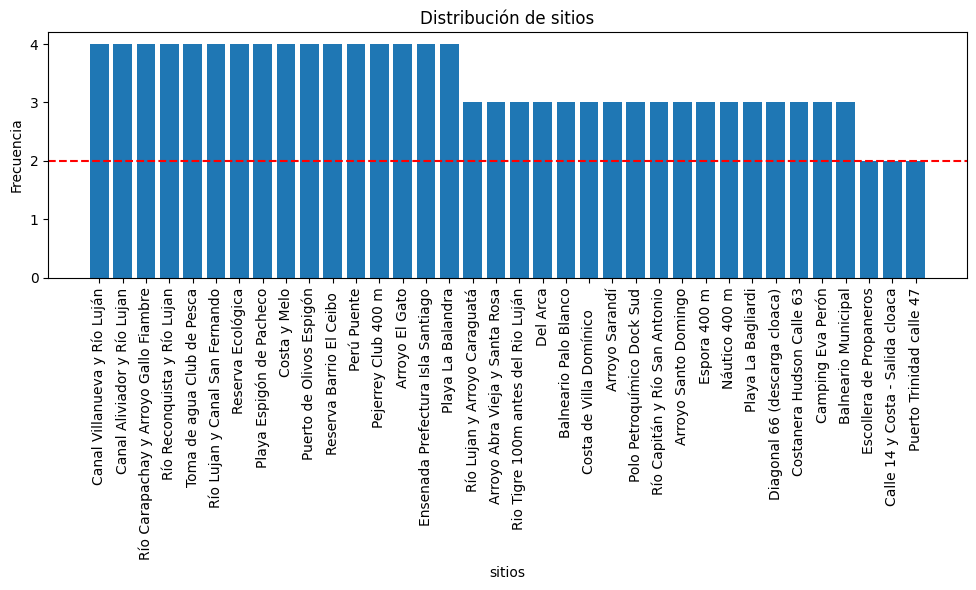

In [69]:
import matplotlib.pyplot as plt

# contamos las frecuencias de cada valor
industry_counts = preprocessed_dataset['sitios'].value_counts()

# ordenamos las frecuencias de mayor a menor
industry_counts = industry_counts.sort_values(ascending=False)

# graficamos el histograma
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario
plt.bar(industry_counts.index, industry_counts.values)
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mayor legibilidad
plt.xlabel('sitios')
plt.ylabel('Frecuencia')
plt.title('Distribución de sitios')
plt.axhline(y=2, color='red', linestyle='--')  # Agrega una línea vertical en x=10
plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()

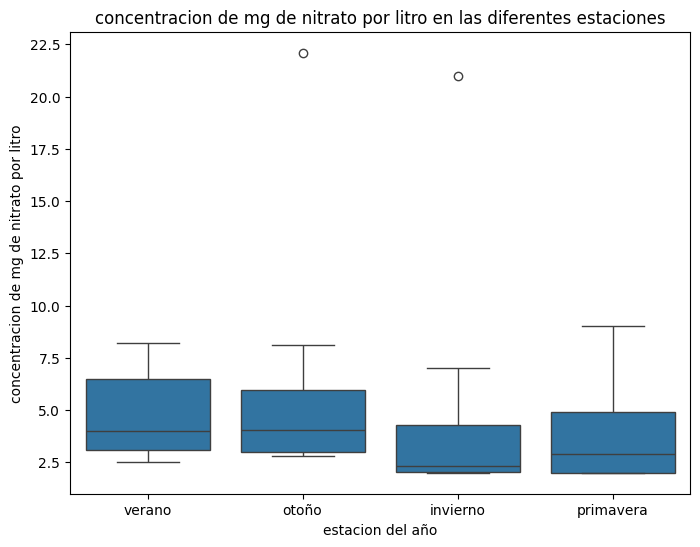

In [46]:
import seaborn as sns
# Agregar etiquetas a los ejes
plt.figure(figsize=(8, 6))
sns.boxplot(x="campaña", y="nitrato_mg_l", data=preprocessed_dataset)

# Agregar etiquetas a los ejes
plt.xlabel("estacion del año")
plt.ylabel("concentracion de mg de nitrato por litro")

# Agregar un título al gráfico
plt.title("concentracion de mg de nitrato por litro en las diferentes estaciones")

# Mostrar el gráfico
plt.show()

In [ ]:
preprocessed_dataset = preprocessed_dataset.dropna(subset=["tem_agua"])
# Agregar etiquetas a los ejes
plt.figure(figsize=(8, 6))
sns.boxplot(x="campaña", y="tem_agua", data=preprocessed_dataset)

# Agregar etiquetas a los ejes
plt.xlabel("estacion del año")
plt.ylabel("temperatura del agua")

# Agregar un título al gráfico
plt.title("temperatura del agua en las diferentes estaciones")

# Mostrar el gráfico
plt.show()

In [71]:
preprocessed_dataset.describe()

,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l_menor_que,cd_total_mg_l_menor_que,clorofila_a_ug_l,microcistina_ug_l_menor_que,ica
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,18.352893,18.711570,6.565950,7.564793,16758.016529,4341.198347,872.239669,4.198347,2.241074,0.541818,0.425041,4.885950,32.061157,27.828926,100.222314,0.338843,0.002157,0.015625,0.380165,45.297521
std,5.603646,8.167294,3.112081,0.741297,27829.755497,9663.800603,2736.650441,2.859049,4.136557,0.351006,0.282058,2.677322,21.760351,22.240041,35.404052,0.421183,0.002195,0.026897,0.346559,9.829076
min,7.000000,4.000000,0.590000,6.660000,100.000000,5.000000,2.000000,2.000000,0.050000,0.190000,0.100000,2.000000,2.000000,4.900000,6.900000,0.000000,0.001000,0.000000,0.150000,26.000000
25%,14.400000,12.000000,4.240000,6.960000,2000.000000,200.000000,50.000000,2.200000,0.410000,0.280000,0.260000,2.700000,30.000000,16.000000,100.000000,0.000000,0.001000,0.010000,0.200000,39.000000
50%,16.000000,17.000000,5.950000,7.430000,5000.000000,1000.000000,200.000000,3.500000,0.980000,0.440000,0.360000,4.200000,30.000000,27.000000,100.000000,0.000000,0.001000,0.010000,0.200000,44.000000
75%,24.000000,27.000000,8.840000,7.930000,15000.000000,3000.000000,700.000000,5.200000,2.800000,0.730000,0.530000,6.500000,37.000000,31.000000,100.000000,0.500000,0.001000,0.010000,0.200000,50.000000
max,28.000000,33.000000,15.200000,9.660000,140000.000000,60000.000000,28000.000000,22.100000,39.000000,1.900000,1.500000,14.000000,125.000000,210.000000,340.000000,1.000000,0.010000,0.221000,1.000000,74.000000
